Author: [DistilledData](https://github.com/DistilledData)

%%latex
\tableofcontents
\pagebreak

# Probability Basics II

This notebook is intended to serve as a study guide for probability basics that are useful in data science. Building on the content in the "Probability_Basics" notebook, this notebook will focus on random variables and related concepts, such as probability distribution and expectation. A background in set theory, some calculus, and some number theory is required to fully appreciate the boring math definitions in these notebooks.

For the sake of brevity, I will discuss common probability distributions that data scientists use in glorious combat in a separate notebook.

## Random Variables

### Definition

A random variable is neither random nor a variable. In particular, a random variable is a [measureable function](https://en.wikipedia.org/wiki/Measurable_function) $X:\Omega\to E$ that maps outcome space $\Omega$ to [measureable space](https://en.wikipedia.org/wiki/Measurable_space) E

### Probability of A Random Variable

Probability that $X$ takes on in a measurable set $S\subseteq E$ is given by

$$P(X\in S)=P(\{\omega\in\Omega|X(\omega)\in S\})$$

While the example below uses a non-trivial mapping, the identity function $X(\omega)=\omega$ is perfectly valid for a random variable!

### Continuous and Discrete Random Variables

**Support:** set of values that can be assumed with non-zero probability by the random variable

As you may guess from the names, a **continuous random variable** has a *continuous or [uncountable](https://en.wikipedia.org/wiki/Uncountable_set) support* and a **discrete random variable** has a *discrete or [countable](https://en.wikipedia.org/wiki/Countable_set) support*

#### Examples of Continuous Random Variables

Below are some examples of **continuous random variables** that can take on values in $\mathbb{R}$

1. The height of incoming students for a college
2. Time
3. Temperature

#### Examples of Discrete Random Variables

**Discrete random variables** come in two distinct flavors: 
- *finite* variables have a limited number of values that can be assumed 
- *infinite* variables have an unlimited (but countable) number of values that can be assumed <br>

Below are some examples of **finite discrete random variables**:
1. The outcome of rolling a fair six-sided die
2. The outcome of flipping a fair two-sided coin
3. The outcome of randomly drawing five cards from a standard deck of cards without replacement

Below are some examples of **infinite discrete random variables**:
1. Given a fair two sided coin, the number of coin flips until we get heads
2. Assuming there are in infinite number of computers connected to the web, the number of unique visitors on a website for a particular day
3. The number of cats in my backyard (how deep is my yard?!?)

Unlike the continuous random variables, even if a discrete random variable can assume an infinite number of values, we can still enumerate them using many (possibly infinite) fingers and toes

### Example of Random Variable

**Question: If you roll three six-sided fair die, what is the probability that the sum of the three rolls is 10?**

Since this example is relatively simple from a computational perspective, I will focus on applying the random variable framework above. We will first define the sample space for the dice rolls

$$\Omega=\{(1, 1, 1), (1, 1, 2),\cdots,(6, 6, 6)\}$$

Since the sum of three dice are the subset of integers $[3, 18]$, we define $E=\{3,4,\cdots,18\}$ and define our random variable $X$ below.

$$X:\Omega\to E$$
$$X\big((x,y,z)\big)\to x+y+z$$

I want to drive home with some math that we are looking for the probability of an event, a subset of $\Omega$ in this example. While the math below is trivial for most people with some mathematics background, I want to focus on the deconstructing thought process that may be useful for more complicated examples.

For our specific problem, $S=\{10\}\subset E$. Since $\{\omega\in\Omega|X(\omega)\in S\}=\{\omega=(a,b,c)\in\Omega|X(\omega)=a+b+c\in S=\{10\}\}$, $\forall\alpha=(x,y,z)\in\Omega$, if $\alpha\in\{\omega\in\Omega|X(\omega)\in S\}$, then $x+y+z=10$. Hence we are looking for the probability of an event $A\subset\Omega$ such that $\forall\beta=(d,e,f)\in A$, $X(\beta)=d+e+f=10$. 

The actual computation and code to find $P(\{\omega\in\Omega|X(\omega)\in S\})$ is rather straight-forward. We will count the number of dice rolls that sum to 10, and divide by the total number of outcomes ($6^3$)

%%latex
\pagebreak

In [1]:
count = 0
for roll1 in range(1,7):
    #amount that roll2 + roll3 must sum to
    remaining = 10 - roll1
    #if roll2 == remaining, then we stop
    for roll2 in range(1, min(remaining, 7)):
        #in order to sum to 10, roll3 = 10 - roll1 - roll2
        #if roll3 is between 0 and 1, then we have a valid outcome
        if 0 <= remaining - roll2 and remaining - roll2 <= 6:
            count += 1

print("Number of outcomes that sum to 10:\t\t\t", count)
print("Number of total outcomes\t\t\t\t", 6*6*6)
print("Probability of rolling an outcome that sums to 10:\t", count/(6*6*6))        

Number of outcomes that sum to 10:			 27
Number of total outcomes				 216
Probability of rolling an outcome that sums to 10:	 0.125


## Probability Distributions

### Boring Mathematical Definition

A probability distribution is a function $P:\cal{A}\to[0,1]$ that maps the input space $A$ (related in some way to the sample space $\Omega$) to probabilities. <br>
A function $P$ is a probability function $\iff$ it satisfies the Kolgomorov Axioms (the axioms of probability that we encountered in the "Probability_Basics" notebook)

### Probability Mass Functions (PMF)

Given a discrete random variable $X$, a PMF is a probability distribution $p:\mathbb{R}\to[0,1]$ defined by $p_X(x_i)=P(X=x_i)$ where $-\infty<x_i<\infty$ and $P$ is a probability measure

### Probability Density Function (PDF)

Given a continuous random variable $X$, a PDF is a probability distribtuion $f_X:\mathbb{R}\to[0,\infty)$ such that for all intervals $[a,b]\subseteq\mathbb{R}$, 

$$P(X\in[a,b])=\int_a^bf_X(x)dx$$

### Discussion

You may be curious why we have two separate definitions depending on whether a random variable is discrete or continuous. In our definition for PMF, we assign a non-zero probability for a given value $x_i$. What happens when we try to apply the definition of PDF to a particular value? Using the definition above, we obtain

$$P(X=x_i)=P(X\in[x_i,x_i])=\int_{x_i}^{x_i}f_X(x)dx=0$$
 
 We have just shown that the probability assigned to any particular value with respect to a continuous random variable is 0! Intuitively, since continuous random variables operate on intervals and discrete random variables operate with respect to distinct values, we require different mathematical definitions to accomodate the different cases.

### Cumulative Density Function (CDF)

The CDF of a real-valued random variable $X$ is given by $F_X(x)=P(X\le x)$

#### Properties of CDF

1. $F_X$ is non-decreasing
2. $F_X$ is [right-continuous](https://en.wikipedia.org/wiki/Continuous_function#Directional_and_semi-continuity) $\big($this may be thought of intuitively as the limit approaching from the right exists for all values of the domain, or $\forall c\in\mathbb{R} \lim\limits_{x\to c+}F_X(x)=F_X(c)\big)$
2. $\lim\limits_{x\to-\infty}F_X(x)=0$
3. $\lim\limits_{x\to+\infty}F_X(x)=1$

### Continuing our Die Example

Continuing our work with rolling three die, let us construct the PMF and CDF for our discrete case.

%%latex
\pagebreak

In [2]:
import numpy as np

#there are 16 possible sums ranging from 3 to 18
count = [0 for i in range(18)]

for i in range(1, 7):
    for j in range(1, 7):
        for k in range(1, 7):
            count[i + j + k - 1] += 1

pdf = [c/216 for c in count]
cdf = np.cumsum(pdf)
print("sum", '\t', "frequency", '\t', "pdf", '\t\t', "cdf")
for i in range(18):
    print(i+1, '\t', count[i], '\t\t', '{:.6f}'.format(pdf[i]), '\t', '{:.6f}'.format(cdf[i]))

sum 	 frequency 	 pdf 		 cdf
1 	 0 		 0.000000 	 0.000000
2 	 0 		 0.000000 	 0.000000
3 	 1 		 0.004630 	 0.004630
4 	 3 		 0.013889 	 0.018519
5 	 6 		 0.027778 	 0.046296
6 	 10 		 0.046296 	 0.092593
7 	 15 		 0.069444 	 0.162037
8 	 21 		 0.097222 	 0.259259
9 	 25 		 0.115741 	 0.375000
10 	 27 		 0.125000 	 0.500000
11 	 27 		 0.125000 	 0.625000
12 	 25 		 0.115741 	 0.740741
13 	 21 		 0.097222 	 0.837963
14 	 15 		 0.069444 	 0.907407
15 	 10 		 0.046296 	 0.953704
16 	 6 		 0.027778 	 0.981481
17 	 3 		 0.013889 	 0.995370
18 	 1 		 0.004630 	 1.000000


%%latex
\pagebreak

Text(0.5, 1.0, 'PMF for Sum of Three Dice Rolls')

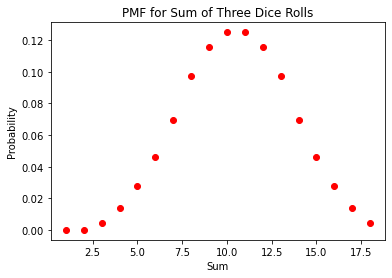

In [3]:
import matplotlib.pyplot as plt

sum_values = [i + 1 for i in range(18)]
plt.plot(sum_values,pdf, 'ro')
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.title("PMF for Sum of Three Dice Rolls")

%%latex
\pagebreak

Text(0.5, 1.0, 'CDF for Sum of Three Dice Rolls')

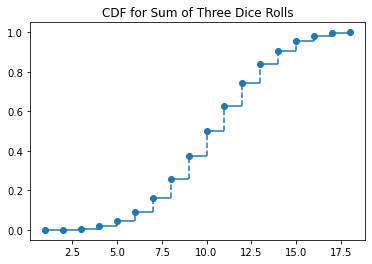

In [5]:
fig, ax = plt.subplots()
#fig.set_figheight(6)
#fig.set_figwidth(6)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
ax.hlines(y=cdf[:-1], xmin=sum_values[:-1], xmax=sum_values[1:],
          zorder=1)

# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
ax.vlines(x=sum_values[1:], ymin=cdf[:-1], ymax=cdf[1:], 
          linestyle='dashed', zorder=1)

ax.scatter(sum_values,cdf)
#plt.xlabel("Sum")
#plt.ylabel("Cumulative Probability")
plt.title("CDF for Sum of Three Dice Rolls")

### Discussion

We should briefly discuss some stylistic choices I made above when constructing the plots for the PMF and CDF. Since the PMF is defined on indiviidual values, I opted for a scatter plot wihtout any lines. Similarly, the discrete nature of the probabilities means that the CDF is a step function (in fact the CDF for any discrete random variable will be a step function), and some clever use of vline and hlines allows us to construct a reasonable looking CDF.

The main reason for this discussion section to warn the user to be careful when constructing probability plots to avoid misleading others. If I had decided to use the default lines that are built into the `pyplot.plot` function, I would have been giving the false impression that the probabilities are continuous from one sum to the next in the PMF, and that there is a smooth increase in the CDF as we move from 3 to 18.

I want to also mention a curious aspect of the CDF that results from its particular mathematical definition. While the PMF function for a sum of 3.5 is 0, the CDF for 3.5 is 0.004630 because $F_X(3.5)=P(X\le 3.5)$. In this fashion, the PDF and CDF before 3 are both 0. Meanwhile, the PDF for values greater than 18 is 0 because the sum for three die cannot be greater than 18, but the CDF for values greater than or equal to 18 is 1 because $F_X(x)=P(X \le x)=1$ when $x\ge 18$.

## Expected Value

Given a random variable $X$, $\mathbb{E}[X]$ is the arithmetic mean of a large number of independent realizations of $X$. In other words, after running a many many trials of an experiment, what is the value we would expect to get for $X$?

The mathematical definition for expected value of a random variable $X$ defined on a [probability space](https://en.wikipedia.org/wiki/Probability_space) $(\Omega, \Sigma, P)$ is given by

$$\mathbb{E}[X]=\int_\Omega X(\omega)dP(\omega)$$

As foreshadowed in our discussion above, the mathematics involved simplifies to slightly different forms depending on whether we have a discrete or continuous random variable.

### Discrete Random Variable

Since the main difference between a finite and infinite discrete random variable is the cardinality of the outcome space $\Omega$, the only significant difference in the definitions below is the value for the upper limit for the summation.

#### Finite Discrete Random Variable

Given a discrete random variable $X$ that can take on k discrete values $x_1,\cdots,x_k$ such that $P(X=x_i)=p_i$, we define the expected value below:

$$\mathbb{E}[X]=\sum\limits_i^k x_i p_i$$

#### Infinite Discrete Random Variable

Given a discrete random variable $X$ that can take on infinite discrete values $x_1,x_2,\cdots$ such that $P(X=x_i)=p_i$, we define the expected value below: 

$$\mathbb{E}[X]=\sum\limits_i^\infty x_i p_i$$

### Continuous Random Variable

Given a real-valued continuous random variable $X$ with denisty function $f(x)$, the expected value is given by 

$$\mathbb{E}[X]=\int_\mathbb{R} xf(x)dx$$

### Expectation for CDF

Given a real-valued random variable $X$ with CDF $F_X$, the expected value is given by

$$\mathbb{E}[X]=\int_\mathbb{R}xdF_X(x)$$

## Useful Properties of Expected Values

### **Non-Negativity**

If a real-valued random variable $X\ge 0$, then $\mathbb{E}[X]\ge 0$

### **Linearity of Expectation**

Given two random variables $X$ and $Y$, <br>
1. $\mathbb{E}[X+Y]=\mathbb{E}[X]+\mathbb{E}[Y]$ <br>
2. $\forall\alpha\in\mathbb{R}$ $\mathbb{E}[\alpha X]=\alpha\mathbb{E}[X]$

### **Monotonicity**

Given two real-valued random variables X and Y, if $X\ge Y$ and both $\mathbb{E}[X]$ and $\mathbb{E}[Y]$ exists, then $\mathbb{E}[X]\le\mathbb{E}[Y]$

### **Law of the Unconscious Statistician**

If $g(X)$ is a measurable function of a random variable $X$ with probability density function $f(x)$, <br>
then the expected value is given by the inner product of $f$ and $g$.

If $X$ is a continuous random variable with PDF $f$, then the expected value is given by

$$\mathbb{E}[g(X)]=\int_\mathbb{R}g(x)f(x)dx$$

If $X$ is a discrete random variable with PMF $f$, then the expected value is given by

$$\mathbb{E}[g(X)]=\sum\limits_x g(x)f(x)$$

If $X$ is a real-valued random variable with CDF $F_X$, then the expected value is given by

$$\mathbb{E}[g(X)]=\int_\mathbb{R}g(x)dF_X(x)$$

### **Non-Multiplicativity and Independence**

In general, for two random variables X and Y, $\mathbb{E}[XY]\ne\mathbb{E}[X]\mathbb{E}[Y]$

However, if X and Y are independent, then $\mathbb{E}[XY]=\mathbb{E}[X]\mathbb{E}[Y]$

### **Equality**

Given two random variables $X$ and $Y$, if $X=Y$, then $\mathbb{E}[X]=\mathbb{E}[Y]$

### **Constant**

Given a random variable $X$, if $X=c$ for some constant $c\in\mathbb{R}$, then $\mathbb{E}[X]=c$